In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./trained.csv")

In [3]:
df.head()

,Unnamed: 0,date,city,trips,total_docks,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,...,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm,weekend
0,0,2013-08-29,San Francisco,518,650,74.0,68.0,61.0,61.0,58.0,...,28.0,0.0,4.0,286.0,0,0,1,0,0,0
1,1,2013-08-29,San Jose,58,234,81.0,72.0,63.0,62.0,61.0,...,24.0,0.0,4.0,320.0,0,0,1,0,0,0
2,2,2013-08-29,Mountain View,10,91,80.0,70.0,64.0,65.0,61.0,...,16.0,0.0,4.0,355.0,0,0,1,0,0,0
3,3,2013-08-29,Redwood City,9,100,80.0,71.0,62.0,63.0,59.0,...,17.0,0.0,5.0,313.0,0,0,1,0,0,0
4,4,2013-08-29,Palo Alto,19,75,78.0,71.0,64.0,62.0,61.0,...,23.0,0.0,4.0,355.0,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3461 non-null   int64  
 1   date                            3461 non-null   object 
 2   city                            3461 non-null   object 
 3   trips                           3461 non-null   int64  
 4   total_docks                     3461 non-null   int64  
 5   max_temperature_f               3461 non-null   float64
 6   mean_temperature_f              3461 non-null   float64
 7   min_temperature_f               3461 non-null   float64
 8   max_dew_point_f                 3461 non-null   float64
 9   mean_dew_point_f                3461 non-null   float64
 10  min_dew_point_f                 3461 non-null   float64
 11  max_humidity                    3461 non-null   float64
 12  mean_humidity                   34

In [5]:
df[df.isnull().values==True].drop_duplicates()

,Unnamed: 0,date,city,trips,total_docks,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,...,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm,weekend


In [6]:
df = df.iloc[: , 1:]

In [7]:
df_sf = df[df["city"]=="San Francisco"]
df_sj = df[df["city"]=="San Jose"]
df_mv = df[df["city"]=="Mountain View"]
df_rc = df[df["city"]=="Redwood City"]
df_pa = df[df["city"]=="Palo Alto"]

In [8]:
labels_sf = df_sf.trips
train_sf = df_sf.drop(['trips', 'date','city'], 1)
labels_sj = df_sj.trips
train_sj = df_sj.drop(['trips', 'date','city'], 1)
labels_mv = df_mv.trips
train_mv = df_mv.drop(['trips', 'date','city'], 1)
labels_rc = df_rc.trips
train_rc = df_rc.drop(['trips', 'date','city'], 1)
labels_pa = df_pa.trips
train_pa = df_pa.drop(['trips', 'date','city'], 1)

<font size=5> Dealing with data of city of SF </font>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_sf, labels_sf, test_size = 0.2, random_state = 22)

In [10]:
df_sf.head()

,date,city,trips,total_docks,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm,weekend
0,2013-08-29,San Francisco,518,650,74.0,68.0,61.0,61.0,58.0,56.0,...,28.0,0.0,4.0,286.0,0,0,1,0,0,0
5,2013-08-30,San Francisco,470,650,78.0,69.0,60.0,61.0,58.0,56.0,...,35.0,0.0,2.0,291.0,0,0,1,0,0,0
14,2013-08-31,San Francisco,353,650,71.0,64.0,57.0,57.0,56.0,54.0,...,31.0,0.0,4.0,284.0,0,0,1,0,0,1
16,2013-09-01,San Francisco,411,650,74.0,66.0,58.0,60.0,56.0,53.0,...,29.0,0.0,4.0,284.0,0,0,1,0,0,1
20,2013-09-02,San Francisco,440,650,75.0,69.0,62.0,61.0,60.0,58.0,...,30.0,0.0,6.0,277.0,0,0,1,0,0,0


In [11]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 3457
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            733 non-null    object 
 1   city                            733 non-null    object 
 2   trips                           733 non-null    int64  
 3   total_docks                     733 non-null    int64  
 4   max_temperature_f               733 non-null    float64
 5   mean_temperature_f              733 non-null    float64
 6   min_temperature_f               733 non-null    float64
 7   max_dew_point_f                 733 non-null    float64
 8   mean_dew_point_f                733 non-null    float64
 9   min_dew_point_f                 733 non-null    float64
 10  max_humidity                    733 non-null    float64
 11  mean_humidity                   733 non-null    float64
 12  min_humidity                    733

In [12]:
lir = LinearRegression()

In [13]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 22)

In [14]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 22)

In [15]:
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 22)

In [16]:
xgb_clf = xgb.XGBClassifier(
                            n_estimators = 100, 
                            learning_rate = 0.1,
                            booster = 'gblinear',
                            eval_metric = 'mlogloss')

In [17]:
lir.fit(X_train, y_train)
lir.score(X_test, y_test)

0.7514080726806307

In [18]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8608462785719687

In [19]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.8362533698033547

In [20]:
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

0.7796588044171319

In [21]:
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.013605442176870748

In [22]:
def scoring(clf):
    #5 fold cross validation. multiply by -1 to make values positive
    #using Median absolute error regression loss to 
    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=1, scoring = 'neg_median_absolute_error')
    return (np.median(scores) * -1)

In [23]:
model_list = [lir ,rfr, gbr, abr, xgb_clf]
model_full_name_list = ['Linear Regression',
                        'Random Forest Regressor', 
                        'Gradient Boosting Regressor',
                        'Ada Boost Regressor', 
                        'XGB Classifier']
for i in range(5):
    score = scoring(model_list[i])
    print("The score by cross-validation of", model_full_name_list[i], 'is', score)

The score by cross-validation of Linear Regression is 97.02548102897163
The score by cross-validation of Random Forest Regressor is 69.10733503869866
The score by cross-validation of Gradient Boosting Regressor is 69.41101149069138
The score by cross-validation of Ada Boost Regressor is 98.52941176470588
The score by cross-validation of XGB Classifier is 86.0


In [24]:
gbr = gbr.fit(X_train, y_train)
rfr = rfr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_test)
rfr_preds = rfr.predict(X_test)

In [25]:
print ("Daily error of trip count using Gradient Boosting Regressor is", median_absolute_error(y_test, gbr_preds))
print ("Daily error of trip count using Random Forest Regressor is:", median_absolute_error(y_test, rfr_preds))

Daily error of trip count using Gradient Boosting Regressor is 65.84246092301078
Daily error of trip count using Random Forest Regressor is: 59.30405483405485


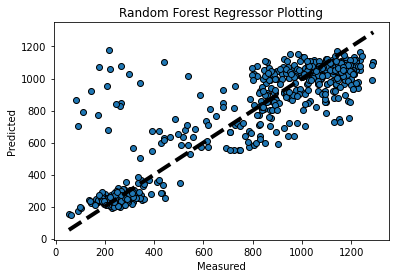

In [26]:
predicted = cross_val_predict(rfr, X_train, y_train, cv=5)

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Random Forest Regressor Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

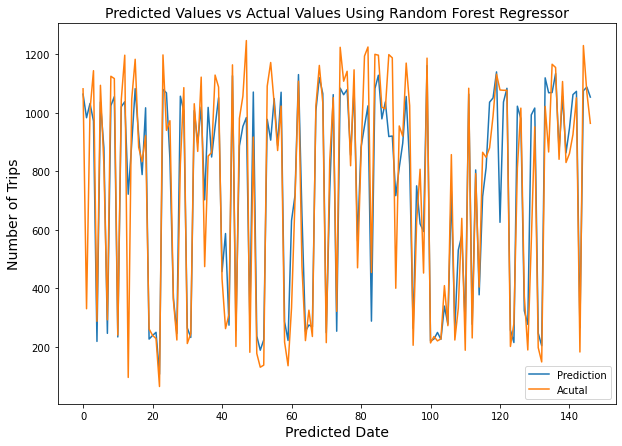

In [27]:
rfr.fit(X_train, y_train )
predicted = rfr.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Random Forest Regressor", fontsize = 14)
plt.show()

<AxesSubplot:title={'center':'Feature importances of Random Forest Regressor'}>

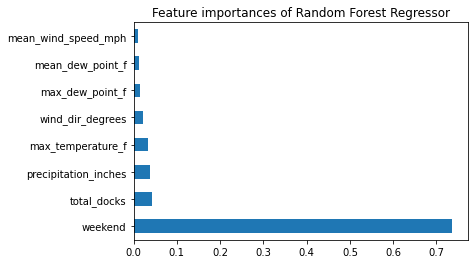

In [28]:
%matplotlib inline 
(pd.Series(rfr.feature_importances_, index=X_train.columns)
 .nlargest(8)
 .plot(title = "Feature importances of Random Forest Regressor",kind='barh'))

In [29]:
dtr = DecisionTreeRegressor(min_samples_leaf = 4,
                            max_depth = 32,
                            random_state = 2)
dtr.fit(X_train, y_train)
scoring(dtr)

80.75

In [30]:
dtr_preds = dtr.predict(X_test)

In [31]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
scoring(regr)

182.7035873850965

In [32]:
regr_preds = regr.predict(X_test)

In [33]:
print(f'median_absolute_error of decision tree regressor: {median_absolute_error(y_test, dtr_preds)}')
print(f'median_absolute_error of mlp regressor: {median_absolute_error(y_test, regr_preds)}')

median_absolute_error of decision tree regressor: 58.0
median_absolute_error of mlp regressor: 181.31614394127826


<font size=5> Dealing with data of city of SJ </font>

In [34]:
df_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 1 to 3458
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            733 non-null    object 
 1   city                            733 non-null    object 
 2   trips                           733 non-null    int64  
 3   total_docks                     733 non-null    int64  
 4   max_temperature_f               733 non-null    float64
 5   mean_temperature_f              733 non-null    float64
 6   min_temperature_f               733 non-null    float64
 7   max_dew_point_f                 733 non-null    float64
 8   mean_dew_point_f                733 non-null    float64
 9   min_dew_point_f                 733 non-null    float64
 10  max_humidity                    733 non-null    float64
 11  mean_humidity                   733 non-null    float64
 12  min_humidity                    733

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_sj, labels_sj, test_size = 0.2, random_state = 22)

In [36]:
lir = LinearRegression()

rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 22)

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 22)
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 22)
xgb_clf = xgb.XGBClassifier(
                            n_estimators = 100, 
                            learning_rate = 0.1,
                            booster = 'gblinear',
                            eval_metric = 'mlogloss')

In [37]:
for i in range(5):
    score = scoring(model_list[i])
    print("The score by cross-validation of", model_full_name_list[i], 'is', score)

The score by cross-validation of Linear Regression is 7.062556109740569
The score by cross-validation of Random Forest Regressor is 7.133038829857018
The score by cross-validation of Gradient Boosting Regressor is 8.225814818515047
The score by cross-validation of Ada Boost Regressor is 8.075471698113205
The score by cross-validation of XGB Classifier is 8.0


In [38]:
lir = lir.fit(X_train, y_train)
rfr = rfr.fit(X_train, y_train)
lir_preds = lir.predict(X_test)
rfr_preds = rfr.predict(X_test)

In [39]:
print ("Daily error of trip count using Linear Regression is", median_absolute_error(y_test, gbr_preds))
print ("Daily error of trip count using Random Forest Regressor is:", median_absolute_error(y_test, rfr_preds))

Daily error of trip count using Linear Regression is 789.8528782657676
Daily error of trip count using Random Forest Regressor is: 7.070680632498814


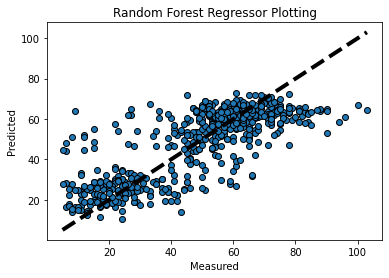

In [40]:
predicted = cross_val_predict(rfr, X_train, y_train, cv=5)

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Random Forest Regressor Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

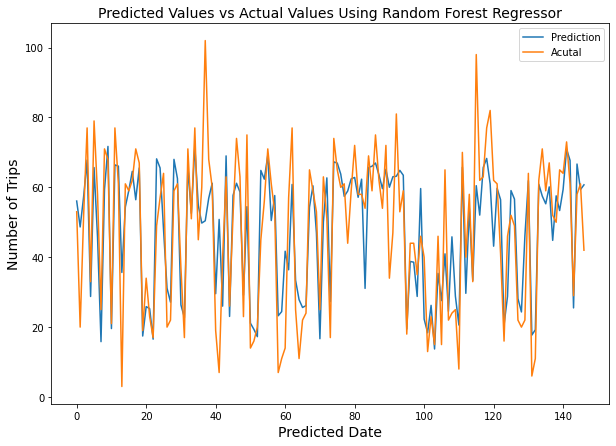

In [41]:
rfr.fit(X_train, y_train )
predicted = rfr.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Random Forest Regressor", fontsize = 14)
plt.show()

<font size=5> Dealing with data of city of MV </font>

In [42]:
df_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 2 to 3459
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            722 non-null    object 
 1   city                            722 non-null    object 
 2   trips                           722 non-null    int64  
 3   total_docks                     722 non-null    int64  
 4   max_temperature_f               722 non-null    float64
 5   mean_temperature_f              722 non-null    float64
 6   min_temperature_f               722 non-null    float64
 7   max_dew_point_f                 722 non-null    float64
 8   mean_dew_point_f                722 non-null    float64
 9   min_dew_point_f                 722 non-null    float64
 10  max_humidity                    722 non-null    float64
 11  mean_humidity                   722 non-null    float64
 12  min_humidity                    722

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train_mv, labels_mv, test_size = 0.2, random_state = 22)

In [44]:
lir = LinearRegression()

rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 22)

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 22)
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 22)
xgb_clf = xgb.XGBClassifier(
                            n_estimators = 100, 
                            learning_rate = 0.1,
                            booster = 'gblinear',
                            eval_metric = 'mlogloss')

In [45]:
for i in range(5):
    score = scoring(model_list[i])
    print("The score by cross-validation of", model_full_name_list[i], 'is', score)

The score by cross-validation of Linear Regression is 5.688064089746113
The score by cross-validation of Random Forest Regressor is 4.393249376885743
The score by cross-validation of Gradient Boosting Regressor is 4.877404783385156
The score by cross-validation of Ada Boost Regressor is 4.580645161290324
The score by cross-validation of XGB Classifier is 5.0


In [46]:
rfr = rfr.fit(X_train, y_train)
abr = abr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
abr_preds = abr.predict(X_test)

print ("Daily error of trip count using Ada Boost Regressor is", median_absolute_error(y_test, abr_preds))
print ("Daily error of trip count using Random Forest Regressor is:", median_absolute_error(y_test, rfr_preds))

Daily error of trip count using Ada Boost Regressor is 4.573170731707316
Daily error of trip count using Random Forest Regressor is: 4.492965367965372


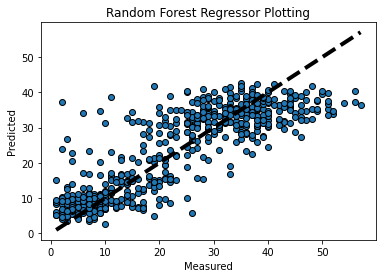

In [47]:
predicted = cross_val_predict(rfr, X_train, y_train, cv=5)

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Random Forest Regressor Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

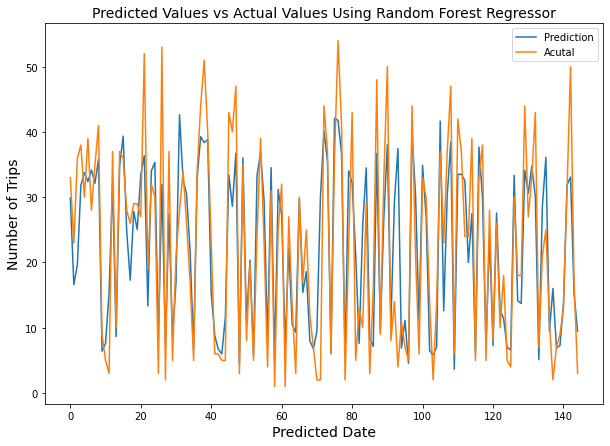

In [48]:
rfr.fit(X_train, y_train )
predicted = rfr.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Random Forest Regressor", fontsize = 14)
plt.show()

<font size=5> Dealing with data of city of RC </font>

In [49]:
df_rc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 3 to 3456
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            629 non-null    object 
 1   city                            629 non-null    object 
 2   trips                           629 non-null    int64  
 3   total_docks                     629 non-null    int64  
 4   max_temperature_f               629 non-null    float64
 5   mean_temperature_f              629 non-null    float64
 6   min_temperature_f               629 non-null    float64
 7   max_dew_point_f                 629 non-null    float64
 8   mean_dew_point_f                629 non-null    float64
 9   min_dew_point_f                 629 non-null    float64
 10  max_humidity                    629 non-null    float64
 11  mean_humidity                   629 non-null    float64
 12  min_humidity                    629

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_rc, labels_rc, test_size = 0.2, random_state = 22)

In [51]:
lir = LinearRegression()
lor = LogisticRegression(solver = 'liblinear')
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 22)

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 22)
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 22)
xgb_clf = xgb.XGBClassifier(
                            n_estimators = 100, 
                            learning_rate = 0.1,
                            booster = 'gblinear',
                            eval_metric = 'mlogloss')

In [52]:
model_list1 = [lir ,lor, rfr, gbr, abr, xgb_clf]
model_full_name_list1 = ['Linear Regression',
                         'Logistic Regression',
                        'Random Forest Regressor', 
                        'Gradient Boosting Regressor',
                        'Ada Boost Regressor', 
                        'XGB Classifier']

for i in range(6):
    score = scoring(model_list1[i])
    print("The score by cross-validation of", model_full_name_list1[i], 'is', score)


The score by cross-validation of Linear Regression is 2.226907031734566
The score by cross-validation of Logistic Regression is 2.0
The score by cross-validation of Random Forest Regressor is 2.13580512921422
The score by cross-validation of Gradient Boosting Regressor is 2.1285351184229757
The score by cross-validation of Ada Boost Regressor is 2.1906779661016946
The score by cross-validation of XGB Classifier is 2.0


In [53]:
lor = lor.fit(X_train, y_train)
xgb_clf = xgb_clf.fit(X_train, y_train)
lor_preds = lor.predict(X_test)
xgb_clf_preds = xgb_clf.predict(X_test)

print ("Daily error of trip count using Logistic Regression is", median_absolute_error(y_test, lor_preds))
print ("Daily error of trip count using XGB Classifier is:", median_absolute_error(y_test, xgb_clf_preds))

Daily error of trip count using Logistic Regression is 2.0
Daily error of trip count using XGB Classifier is: 2.0


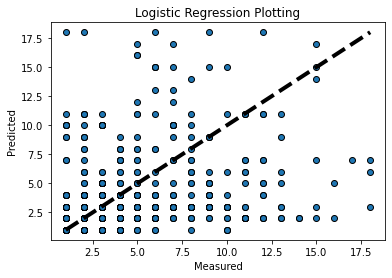

In [54]:
predicted = cross_val_predict(lor, X_train, y_train, cv=5)

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Logistic Regression Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

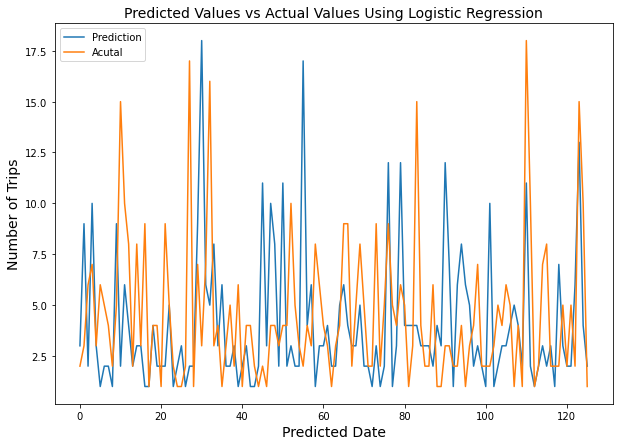

In [55]:
lor.fit(X_train, y_train )
predicted = lor.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Logistic Regression", fontsize = 14)
plt.show()

<font size=5> Dealing with data of city of PA </font>

In [56]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 4 to 3460
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            644 non-null    object 
 1   city                            644 non-null    object 
 2   trips                           644 non-null    int64  
 3   total_docks                     644 non-null    int64  
 4   max_temperature_f               644 non-null    float64
 5   mean_temperature_f              644 non-null    float64
 6   min_temperature_f               644 non-null    float64
 7   max_dew_point_f                 644 non-null    float64
 8   mean_dew_point_f                644 non-null    float64
 9   min_dew_point_f                 644 non-null    float64
 10  max_humidity                    644 non-null    float64
 11  mean_humidity                   644 non-null    float64
 12  min_humidity                    644

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train_pa, labels_pa, test_size = 0.2, random_state = 22)

In [58]:
lir = LinearRegression()

rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 22)

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 22)
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 22)
xgb_clf = xgb.XGBClassifier(
                            n_estimators = 100, 
                            learning_rate = 0.1,
                            booster = 'gblinear',
                            eval_metric = 'mlogloss')

In [59]:
for i in range(5):
    score = scoring(model_list[i])
    print("The score by cross-validation of", model_full_name_list[i], 'is', score)

The score by cross-validation of Linear Regression is 2.3808569678947524
The score by cross-validation of Random Forest Regressor is 2.2661223624859987
The score by cross-validation of Gradient Boosting Regressor is 2.6201575113695856
The score by cross-validation of Ada Boost Regressor is 2.291079812206573
The score by cross-validation of XGB Classifier is 2.0


In [60]:
rfr = rfr.fit(X_train, y_train)
xgb_clf = xgb_clf.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
xgb_clf_preds = xgb_clf.predict(X_test)

print ("Daily error of trip count using Random Forest Regressor is", median_absolute_error(y_test, rfr_preds))
print ("Daily error of trip count using XGB Classifier is:", median_absolute_error(y_test, xgb_clf_preds))

Daily error of trip count using Random Forest Regressor is 2.52969696969697
Daily error of trip count using XGB Classifier is: 3.0


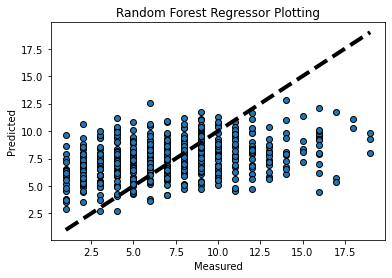

In [61]:
#Random Forest Regressor Plotting
predicted = cross_val_predict(rfr, X_train, y_train, cv=5)
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Random Forest Regressor Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

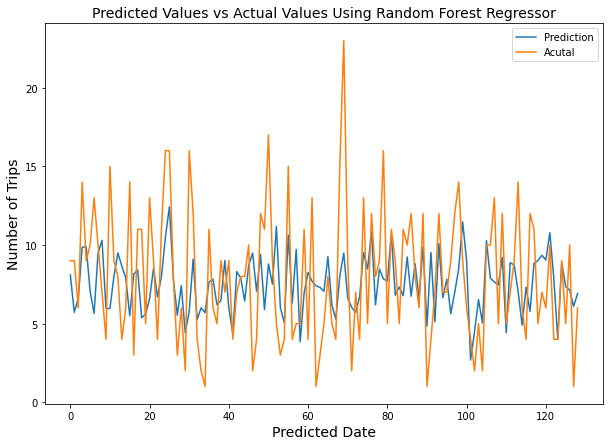

In [62]:
rfr.fit(X_train, y_train )
predicted = rfr.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Random Forest Regressor", fontsize = 14)
plt.show()